In [48]:
import numpy as np
import pandas as pd
import os
from tabulate import tabulate
import matplotlib.pyplot as plt

# Q1

In [2]:
def load_data(file_name,index_col):
    current_directory = os.getcwd()
    parent_directory = os.path.abspath(os.path.join(current_directory, '..'))
    file_path = os.path.join(parent_directory, file_name)
    dataset = pd.read_csv(file_path,index_col=index_col)
    return dataset

In [3]:
dataset = load_data('synthetic_software_defect.csv', index_col='id')

In [4]:
dataset

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
id,,,,,,,,,,,,,,,,,,,,,
0,22.0,3.0,1.0,2.0,60.0,278.63,0.06,19.56,14.25,5448.79,...,17,1,1,0,16.0,9.0,38.0,22.0,5.0,False
1,14.0,2.0,1.0,2.0,32.0,151.27,0.14,7.00,21.11,936.71,...,11,0,1,0,11.0,11.0,18.0,14.0,3.0,False
2,11.0,2.0,1.0,2.0,45.0,197.65,0.11,8.05,22.76,1754.01,...,8,0,1,0,12.0,11.0,28.0,17.0,3.0,False
3,8.0,1.0,1.0,1.0,23.0,94.01,0.19,5.25,17.86,473.66,...,4,0,2,0,8.0,6.0,16.0,7.0,1.0,True
4,11.0,2.0,1.0,2.0,17.0,60.94,0.18,5.63,12.44,365.67,...,7,0,2,0,7.0,6.0,10.0,10.0,3.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101758,10.0,2.0,1.0,1.0,28.0,122.98,0.15,6.60,18.63,811.70,...,7,0,1,0,11.0,8.0,16.0,12.0,3.0,False
101759,27.0,5.0,4.0,1.0,107.0,559.93,0.06,18.00,34.17,11268.27,...,23,0,2,0,18.0,20.0,67.0,40.0,9.0,False
101760,26.0,1.0,1.0,1.0,83.0,360.17,0.04,22.75,12.56,5893.69,...,20,0,4,0,10.0,8.0,51.0,28.0,1.0,False


In [5]:
dataset['defects'] = dataset['defects'].map({False: 0, True: 1})

# Q2

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101763 entries, 0 to 101762
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   loc                101763 non-null  float64
 1   v(g)               101763 non-null  float64
 2   ev(g)              101763 non-null  float64
 3   iv(g)              101763 non-null  float64
 4   n                  101763 non-null  float64
 5   v                  101763 non-null  float64
 6   l                  101763 non-null  float64
 7   d                  101763 non-null  float64
 8   i                  101763 non-null  float64
 9   e                  101763 non-null  float64
 10  b                  101763 non-null  float64
 11  t                  101763 non-null  float64
 12  lOCode             101763 non-null  int64  
 13  lOComment          101763 non-null  int64  
 14  lOBlank            101763 non-null  int64  
 15  locCodeAndComment  101763 non-null  int64  
 16  un

In [7]:
dataset.describe()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
count,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,1.017630e+05,...,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000
mean,37.347160,5.492684,2.845022,3.498826,96.655995,538.280956,0.111634,13.681881,27.573007,2.085359e+04,...,22.802453,1.773945,3.979865,0.196604,11.896131,15.596671,57.628116,39.249698,9.839549,0.226644
std,54.600401,7.900855,4.631262,5.534541,171.147191,1270.791601,0.100096,14.121306,22.856742,1.905714e+05,...,38.541010,5.902412,6.382358,0.998906,6.749549,18.064261,104.537660,71.692309,14.412769,0.418663
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,13.000000,2.000000,1.000000,1.000000,25.000000,97.670000,0.050000,5.600000,15.560000,5.647300e+02,...,7.000000,0.000000,1.000000,0.000000,8.000000,7.000000,15.000000,10.000000,3.000000,0.000000
50%,22.000000,3.000000,1.000000,2.000000,51.000000,232.790000,0.090000,9.820000,23.360000,2.256230e+03,...,14.000000,0.000000,2.000000,0.000000,11.000000,12.000000,30.000000,20.000000,5.000000,0.000000
75%,42.000000,6.000000,3.000000,4.000000,111.000000,560.250000,0.150000,18.000000,34.340000,1.019324e+04,...,26.000000,1.000000,5.000000,0.000000,16.000000,20.000000,66.000000,45.000000,11.000000,0.000000
max,3442.000000,404.000000,165.000000,402.000000,8441.000000,80843.080000,1.000000,418.200000,569.780000,1.684662e+07,...,2824.000000,344.000000,219.000000,43.000000,410.000000,1026.000000,5420.000000,3021.000000,503.000000,1.000000


# Q3

In [8]:
def correlation(datatset, target_col,num_most):
    correlation_data = []
    for col_name in dataset.columns:
        if col_name == target_col:
            continue
        correlation = dataset[target_col].corr(dataset[col_name])
        if correlation < 0:
            correlation_type = "negatively correlated"
        elif correlation > 0:
            correlation_type = "positively correlated"
        else:
            correlation_type = "not correlated"
            
        correlation_data.append([col_name, correlation, correlation_type])
        
    print(tabulate(correlation_data, headers=["Variable", "Correlation", "Correlation Type"], tablefmt="grid"))
    correlation_data = sorted(correlation_data, key=lambda x: abs(x[1]),reverse=True)
    print('--------------------------------')
    
    for index, most_corr in enumerate(correlation_data[:num_most]):
        print(f"{most_corr[0]} has the {index+1} highest correlation with {target_col}.")
        print(f"correlation value is: {most_corr[1]}")
        print("--")
        
    return correlation_data


In [9]:
correlation_data = correlation(dataset,"defects",2)

+-------------------+---------------+-----------------------+
| Variable          |   Correlation | Correlation Type      |
+===================+===============+=======================+
| loc               |     0.342642  | positively correlated |
+-------------------+---------------+-----------------------+
| v(g)              |     0.301187  | positively correlated |
+-------------------+---------------+-----------------------+
| ev(g)             |     0.259928  | positively correlated |
+-------------------+---------------+-----------------------+
| iv(g)             |     0.245618  | positively correlated |
+-------------------+---------------+-----------------------+
| n                 |     0.25808   | positively correlated |
+-------------------+---------------+-----------------------+
| v                 |     0.231179  | positively correlated |
+-------------------+---------------+-----------------------+
| l                 |    -0.253237  | negatively correlated |
+-------

# Q4

In [10]:
features = [item[0] for item in correlation_data]
dataset = dataset[[features[0], features[1], 'defects']]

In [11]:
dataset

,loc,branchCount,defects
id,,,
0,22.0,5.0,0
1,14.0,3.0,0
2,11.0,3.0,0
3,8.0,1.0,1
4,11.0,3.0,0
...,...,...,...
101758,10.0,3.0,0
101759,27.0,9.0,0
101760,26.0,1.0,0


# Q5

In [12]:
first_shape = dataset.shape[0]

In [13]:
dataset = dataset.drop_duplicates()

In [14]:
second_shape = dataset.shape[0]

In [15]:
percent_dup = ((first_shape - second_shape) * 100) / first_shape

In [16]:
percent_dup

92.06194785924157

# Q6

What is histogram? 
Representation of the distribution of a dataset. 

+ Bins or intervals: The range of values is divided into intervals or bins. 
+ Bar Height: The frequency or count of data points that fall within the corresponding bin.

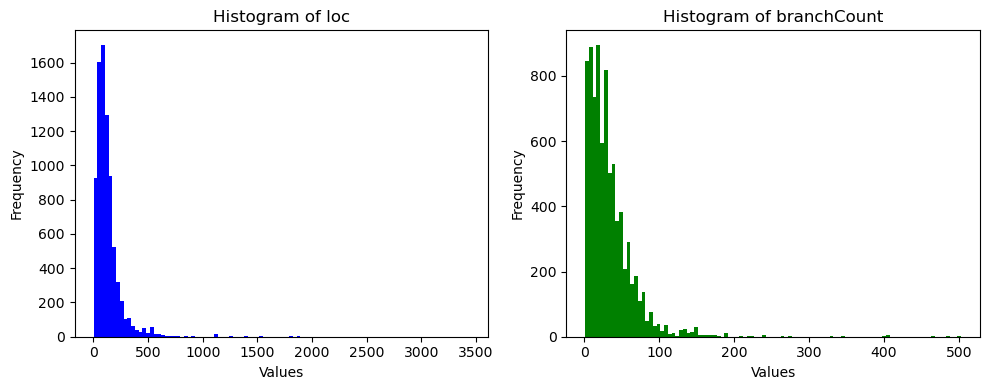

In [17]:
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
hist_loc, bins_loc, _ = plt.hist(dataset['loc'], bins=100, color='blue')
plt.title('Histogram of loc')
plt.xlabel('Values')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
hist_branchCount, bins_branchCount, _ = plt.hist(dataset['branchCount'], bins=100, color='green')
plt.title('Histogram of branchCount')
plt.xlabel('Values')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Q7

To identify the distribution of a feature, you can follow these steps:

    Visual Inspection: Start by plotting a histogram of the feature as previously discussed.

    Common distributions you may encounter include:
        1. Normal Distribution (Gaussian): A symmetric, bell-shaped curve.
        2. Exponential Distribution: A right-skewed distribution with a long tail.
        3. Uniform Distribution: All values are equally likely.
        4. Log-Normal Distribution: The natural logarithm of the data follows a normal distribution.
        5. Poisson Distribution: A discrete distribution for counting events over a fixed interval.

Our data is Exponential distuributed

# Q8

Log-transforming features can be beneficial for several reasons:
1. Handling Skewed Data
2. Equalizing Variance
3. Dealing with Outliers
4. Meeting Assumptions

What is Skewed Data and how to handle it:
+ It is a probability distribution of a dataset in which the data points are not symmetrically distributed around the mean (average).
+ Logarithmic transformation is a common technique for addressing data with a skewed distribution. It can make the distribution of the data more symmetric and closer to a normal (Gaussian) distribution.

In [18]:
dataset['loc'].mean()

129.22072295122555

In [19]:
dataset['branchCount'].mean()

33.95914830403565

In [20]:
dataset_log1p = dataset[['loc', 'branchCount']].apply(np.log1p)

In [21]:
dataset_log1p['defects'] = dataset['defects'] 

# Q9

Whats the difference between np.log1p() and np.log()?

the primary difference between np.log(x) and np.log1p(x) is
how they handle small input values close to zero.

+ If you want to perform a logarithmic transformation on data that includes values near zero,
np.log1p(x) is a safer choice to avoid numerical instability.
+ If you are working with strictly positive data and do not expect values close to zero,
np.log(x) can be used. 

In [22]:
dataset_logp = dataset[['loc', 'branchCount']].apply(np.log)

In [23]:
dataset_logp['defects'] = dataset['defects'] 

# Q10

 Compare their distribution before and after the log-trasform.

The exponential distribution is right-skewed with a long right tail,

while the normal distribution is symmetric and bell-shaped.

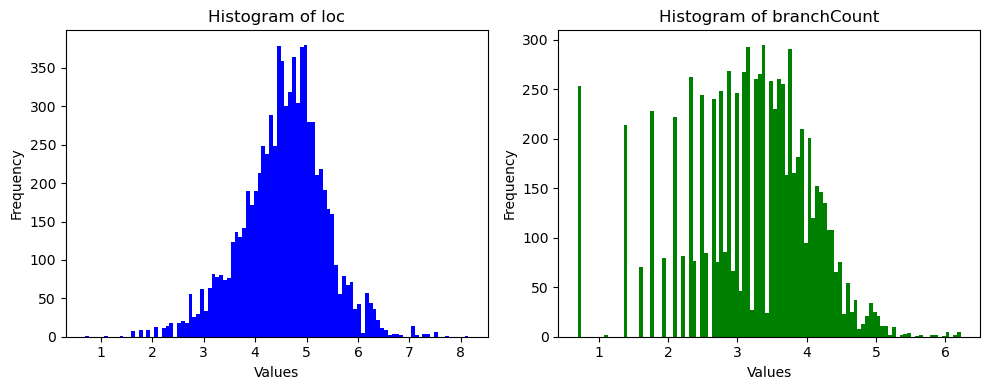

In [24]:
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
hist_loc, bins_loc, _ = plt.hist(dataset_log1p['loc'], bins=100, color='blue')
plt.title('Histogram of loc')
plt.xlabel('Values')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
hist_branchCount, bins_branchCount, _ = plt.hist(dataset_log1p['branchCount'], bins=100, color='green')
plt.title('Histogram of branchCount')
plt.xlabel('Values')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [25]:
dataset = dataset_log1p

# Q11

In [26]:
train_set = dataset.iloc[0:350]

In [27]:
test_set = dataset.iloc[350:400]

# Q12

In [28]:
x_train, y_train = train_set[['loc','branchCount']] , train_set['defects']

In [29]:
x_test, y_test = test_set[['loc','branchCount']] , test_set['defects']

# Q13

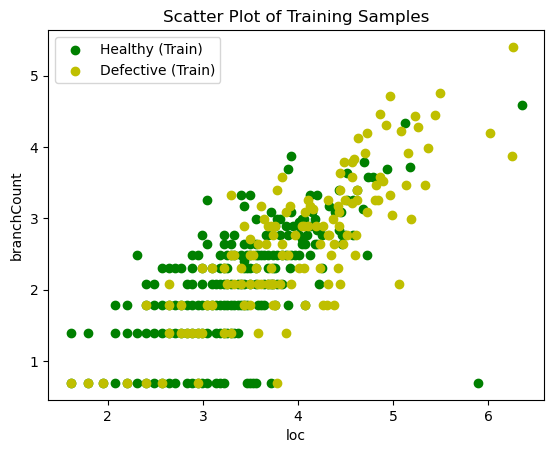

In [30]:
#train
plt.scatter(x_train[y_train == 0]['loc'], x_train[y_train == 0]['branchCount'], c='g', label='Healthy (Train)')
plt.scatter(x_train[y_train == 1]['loc'], x_train[y_train == 1]['branchCount'], c='y', label='Defective (Train)')
plt.xlabel('loc')
plt.ylabel('branchCount')
plt.legend(loc='best')
plt.title('Scatter Plot of Training Samples')
plt.show()

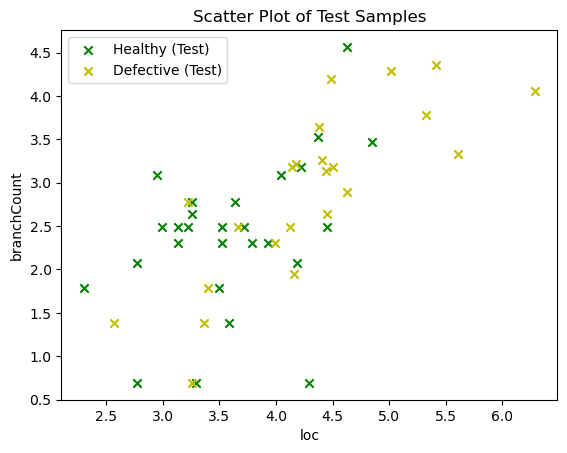

In [31]:
plt.scatter(x_test[y_test == 0]['loc'], x_test[y_test == 0]['branchCount'], c='g', marker='x', label='Healthy (Test)')
plt.scatter(x_test[y_test == 1]['loc'], x_test[y_test == 1]['branchCount'], c='y', marker='x', label='Defective (Test)')
plt.xlabel('loc')
plt.ylabel('branchCount')
plt.legend(loc='best')
plt.title('Scatter Plot of Test Samples')
plt.show()

# Q14

Looking at your scatter plot, are defective and healthy samples well separated?
NO

# Creating our model: logistic regression

+ dichotomous variable 

+ Estimate the probability of occurence

Logistic equation:
 It's an "S"-shaped curve that maps any real-valued number to a value between 0 and 1. 
    $$ \text{Sigmoid}(z) = \frac{1}{1 + e^{-z}} $$
    

$$ \text z = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n $$

z is the input to the function, which is a linear combination of features and model 

the likelihood function helps us find the optimal values of the model's parameters (coefficients) that best explain the observed data. we should __Maximize__ likelihood function: 

$$ \text L(\beta) = \prod_{i=1}^{n} \left( P(y_i = 1) \right)^{y_i} \left(1 - P(y_i = 1)\right)^{1 - y_i} $$


$$ L(\beta) = \sum_{i=1}^{n} [y_i \log(p_i) + (1 - y_i) \log(1 - p_i)] $$

$$ \text{Logistic Loss (Cross-Entropy Loss)} = -\frac{1}{m} \sum_{i=1}^{m} \left( y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)}) \right) $$


$$ \text{Log-logistic loss}(\beta) = \frac{1}{m} \sum_{i=1}^{m} \log(1 + \exp(-y_i \cdot \beta \cdot x_i)) \text{ which is not important.}$$


the logistic loss function is a negative log-likelihood function

$$ \hat{y} \text { is the value of p for a given data point, which is the model's estimate of the probability that the target variable is equal to 1.} $$ 

$$  p(y=1) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n)}} $$

the goal is to __Minimize__ the Logistic Loss (Cross-Entropy Loss) function. 

__Steps for minimizing logistic loss:__
   1. Initialize Parameters
   2. Define the Logistic Loss Function
   3. Compute Gradients
   4. Update Parameters

We have two independent variables denoted as X1 and X2. So, we have the logistic regression model with coefficients (weights) β0, β1, and β2.

# Q1

In [32]:
x_train = x_train.values

In [33]:
x_test = x_test.values

In [34]:
type(x_train)

numpy.ndarray

# Q2

$$ \frac{\partial \text {Logistic loss}(\beta)}{\partial \beta_i} = -\frac{1}{m}\sum_{i=1}^m \left(\hat{y}_i - y_i\right) \cdot x_i^{(i)} $$


In [35]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

$$ H(X) = b0 + b1*X1 + b2*X2 $$

In [36]:
def hypothesis(b0,b1,b2,x):
    z = b0 + b1 * x[:, 0] + b2 * x[:, 1]
    return z

In [37]:
def logistic_loss(y,h):
    cost = -1/m * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

 The key idea is to find the values of β that minimize the cost function,
 
 so the negative sign is implicit in the optimization process.
 
 That's why you don't see the negative sign in the gradient formulas.

In [38]:
iterations = 100
cost_history = []
result = []
m = len(y_train)
for lr in range(1, 11):
    b0 = 0.1
    b1 = 0.2
    b2 = 0.3
    learning_rate = lr / 100.0
    num_iterations = int(iterations / learning_rate)
    cost_values = []
    
    z = hypothesis(b0,b1,b2,x_train)
    predicted_probabilities = sigmoid(z)
    cost_first = logistic_loss(y_train, predicted_probabilities)
    cost_values.append(cost_first)
    
    for i in range(num_iterations):
        z = hypothesis(b0,b1,b2,x_train)
        predicted_probabilities = sigmoid(z)

        gradient0 = np.sum(predicted_probabilities - y_train) / m
        gradient1 = np.sum((predicted_probabilities - y_train) * x_train[:, 0]) / m
        gradient2 = np.sum((predicted_probabilities - y_train) * x_train[:, 1]) / m

        b0 -= learning_rate * gradient0
        b1 -= learning_rate * gradient1
        b2 -= learning_rate * gradient2

        z = hypothesis(b0,b1,b2,x_train)
        predicted_probabilities = sigmoid(z)
        cost = logistic_loss(y_train, predicted_probabilities)
        cost_values.append(cost)
        
    cost_history.append(cost_values)
    result.append([b0,b1,b2,learning_rate,num_iterations,cost])

# Q3

In [39]:
def plot_iterations_cost(cost_history,time):
    plt.figure()
    plt.plot(range(1, len(cost_history[time-1]) + 1), cost_history[time-1])
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title('Cost Function Over Iterations')
    plt.show()

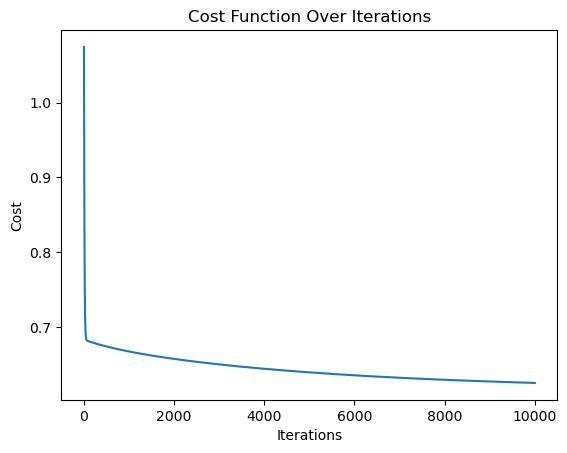

In [40]:
plot_iterations_cost(cost_history,1)

# Q4

Q: Try different learning rates and different number of iterations. What do you infer from this experiment?

A: The reason logistic loss doesn't behave the same as Mean Squared Error (MSE) for linear regression when testing different learning rates and iterations is because they represent different loss functions and optimization processes, and the nature of the problems they solve is different.

Here's why they differ:

1. **Different Loss Functions**: Logistic loss, often referred to as cross-entropy loss, is used for logistic regression, which is a classification problem. It measures the error in class probability predictions. On the other hand, MSE is used for linear regression, which is a regression problem. It measures the error in continuous numeric predictions.

2. **Non-Convex Nature**: The logistic loss is typically non-convex, meaning it has multiple local minima, making it more sensitive to the choice of learning rate and initial conditions. Linear regression with MSE, on the other hand, often has a unique global minimum, so the choice of learning rate and initial conditions is less critical.

3. **Classification vs. Regression**: Logistic regression deals with classification problems, which are fundamentally different from regression problems. In classification, the goal is to predict class probabilities and make discrete decisions (e.g., binary classification). In regression, the goal is to predict continuous numeric values. Different loss functions are used to account for these differences.

4. **Convergence Behavior**: Logistic regression with gradient descent tends to __converge more slowly__ and requires more care in setting hyperparameters due to the non-convex nature of the logistic loss. Linear regression with MSE often converges faster and is more forgiving in terms of hyperparameter choices.

In logistic regression, you often need to consider additional techniques such as proper initialization, regularization, and different optimization algorithms like stochastic gradient descent (SGD) to find a good solution. Therefore, it's expected that logistic loss behaves differently from MSE when testing different learning rates and iterations. The choice of hyperparameters is often more critical for logistic regression, and tuning them may be required to achieve the best performance.

In [41]:
headers = ["b0", "b1","b2", "learning rate","iteration","logistic loss"]
print(tabulate(result, headers, tablefmt="grid", numalign="right", stralign="right"))

+----------+----------+----------+-----------------+-------------+-----------------+
|       b0 |       b1 |       b2 |   learning rate |   iteration |   logistic loss |
+==========+==========+==========+=================+=============+=================+
| -2.15212 | 0.335412 | 0.228806 |            0.01 |       10000 |        0.625231 |
+----------+----------+----------+-----------------+-------------+-----------------+
| -2.15218 | 0.335432 |   0.2288 |            0.02 |        5000 |        0.625231 |
+----------+----------+----------+-----------------+-------------+-----------------+
| -2.15212 | 0.335412 | 0.228807 |            0.03 |        3333 |        0.625231 |
+----------+----------+----------+-----------------+-------------+-----------------+
| -2.15231 | 0.335473 | 0.228788 |            0.04 |        2500 |        0.625229 |
+----------+----------+----------+-----------------+-------------+-----------------+
| -2.15237 | 0.335494 | 0.228783 |            0.05 |        2000 

In [42]:
b0,b1,b2

(-2.1527058753765838, 0.3355989667031475, 0.2287529547562268)

# Q6

In [43]:
def predict(b0,b1,b2,x):
    z = hypothesis(b0,b1,b2,x)
    y_pred_prob = sigmoid(z)
    return y_pred_prob

In [44]:
def accuracy(y_true, y_pred):
    correct = np.sum(y_true == y_pred)
    total = len(y_true)
    return correct / total

y_test_pred_prob = predict(b0,b1,b2,x_test)
y_test_pred = (y_test_pred_prob >= 0.5).astype(int)
test_accuracy = accuracy(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.7


In [45]:
y_train_pred_prob = predict(b0,b1,b2,x_train)
y_train_pred = (y_train_pred_prob >= 0.5).astype(int)
train_accuracy = accuracy(y_train, y_train_pred)
print("Train Accuracy:", train_accuracy)

Train Accuracy: 0.6657142857142857


# Q7

y = -2.1527058753765838 + 0.3355989667031475 * x1 + 0.2287529547562268 * x2

# Q8

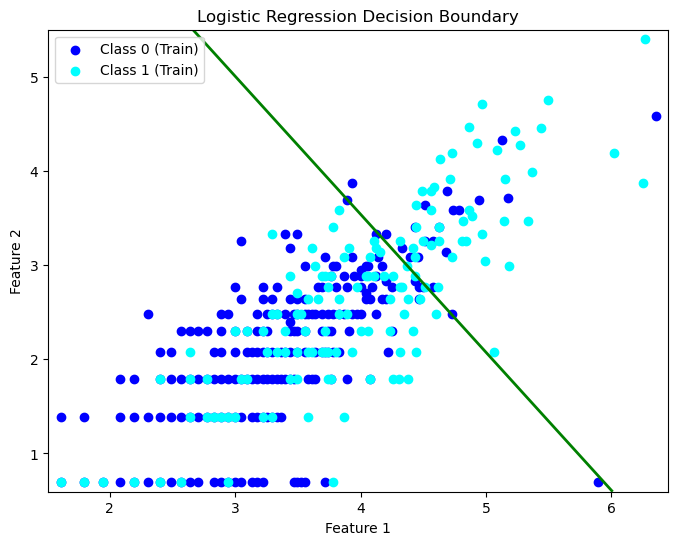

In [46]:
plt.figure(figsize=(8, 6))

plt.scatter(x_train[y_train == 0][:, 0], x_train[y_train == 0][:, 1], color='blue', label='Class 0 (Train)')
plt.scatter(x_train[y_train == 1][:, 0], x_train[y_train == 1][:, 1], color='cyan', label='Class 1 (Train)')

x_min, x_max = x_train[:, 0].min() - 0.1, x_train[:, 0].max() + 0.1
y_min, y_max = x_train[:, 1].min() - 0.1, x_train[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
X_grid = np.c_[xx.ravel(), yy.ravel()]
probs = predict(b0,b1,b2,X_grid).reshape(xx.shape)

plt.contour(xx, yy, probs, levels=[0.5], linewidths=2, colors='green')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='best')
plt.title('Logistic Regression Decision Boundary')
plt.show()

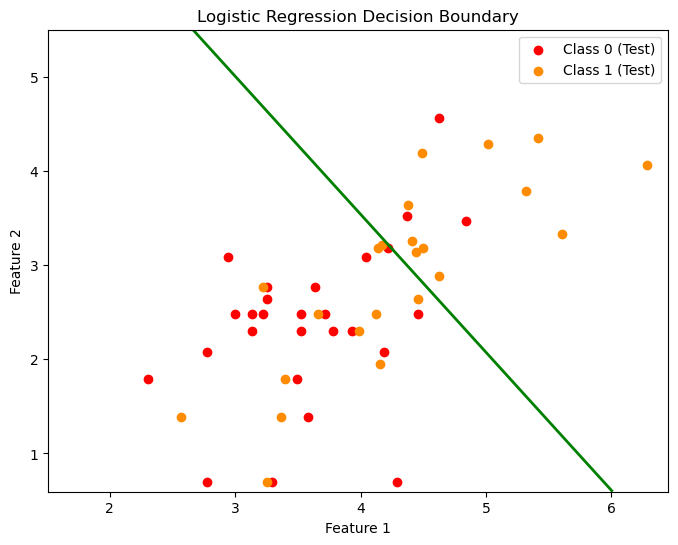

In [47]:
plt.figure(figsize=(8, 6))

plt.scatter(x_test[y_test == 0][:, 0], x_test[y_test == 0][:, 1], color='red', label='Class 0 (Test)')
plt.scatter(x_test[y_test == 1][:, 0], x_test[y_test == 1][:, 1], color='darkorange', label='Class 1 (Test)')

x_min, x_max = x_train[:, 0].min() - 0.1, x_train[:, 0].max() + 0.1
y_min, y_max = x_train[:, 1].min() - 0.1, x_train[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
X_grid = np.c_[xx.ravel(), yy.ravel()]
probs = predict(b0,b1,b2,X_grid).reshape(xx.shape)

plt.contour(xx, yy, probs, levels=[0.5], linewidths=2, colors='green')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='best')
plt.title('Logistic Regression Decision Boundary')
plt.show()

# Closed form solution

Unfortunately, there is no closed-form solution for logistic regression like there is for linear regression.

Logistic regression doesn't have a closed-form solution for its parameters (coefficients) like linear regression because of ___its non-linear nature___.

The logistic function introduces non-linearity into the model, and as a result, the cost function for logistic regression is not convex. It's a non-convex function with multiple local minima.